In [ ]:
#!/usr/bin/env python
# coding: utf-8

import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'

In [1]:
# export TF_ENABLE_ONEDNN_OPTS=0

In [2]:
!pip install -q pmdarima
!pip install -q keras
!pip install -q tensorflow

In [3]:
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose 
from pmdarima import auto_arima                        
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

import tensorflow as tf
tf.config.set_visible_devices([], 'GPU')
from tensorflow import keras
from tensorflow.keras import layers



import warnings
warnings.filterwarnings("ignore")

#TF_ENABLE_ONEDNN_OPTS=0
#CUDA_VISIBLE_DEVICES=""

2023-05-16 17:17:42.188713: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-05-16 17:17:42.190460: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-16 17:17:42.218947: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-16 17:17:42.219822: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-16 17:17:42.693588: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [4]:
# https://alkaline-ml.com/pmdarima/setup.html
# https://pypi.org/project/pmdarima/
# https://medium.com/@cdabakoglu/time-series-forecasting-arima-lstm-prophet-with-python-e73a750a9887

In [5]:
csv_data = pd.read_csv("https://github.com/ourownstory/neuralprophet-data/raw/main/kaggle-energy/datasets/tutorial01.csv")
df = csv_data
df.head()

,ds,y
0,2014-12-31,65.41
1,2015-01-01,62.09
2,2015-01-02,69.44
3,2015-01-03,65.22
4,2015-01-04,58.91


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      1462 non-null   object 
 1   y       1462 non-null   float64
dtypes: float64(1), object(1)
memory usage: 23.0+ KB


In [7]:
df.ds = pd.to_datetime(df.ds)
df = df.set_index("ds")
df.head()

,y
ds,
2014-12-31,65.41
2015-01-01,62.09
2015-01-02,69.44
2015-01-03,65.22
2015-01-04,58.91


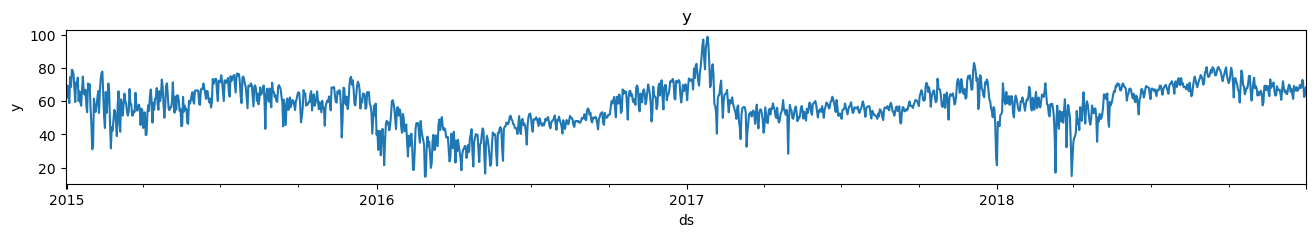

In [8]:
df.index.freq = 'D'
ax = df['y'].plot(figsize = (16,2), title = "y")
ax.set(xlabel='ds', ylabel='y');

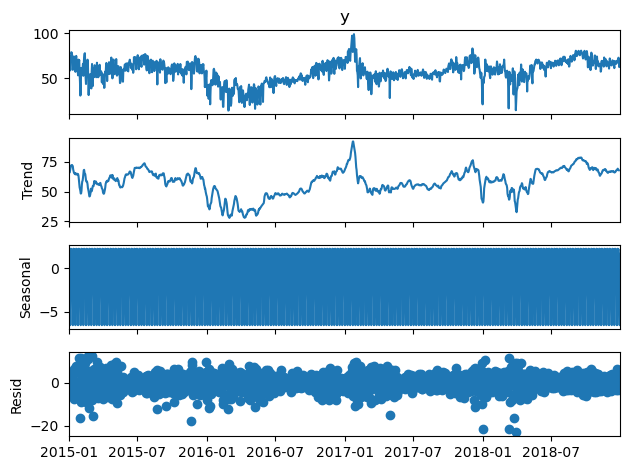

In [9]:
a = seasonal_decompose(df["y"], model = "add")
a.plot();

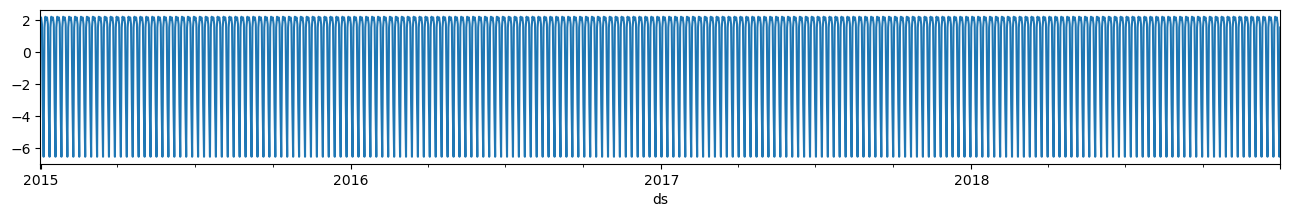

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize = (16,2))
a.seasonal.plot();

In [11]:
#auto_arima(df['y'], seasonal=True, m=12,max_p=7, max_d=5,max_q=7, max_P=4, max_D=4,max_Q=4).summary()
auto_arima(df['y'], seasonal=True, m=1, suppress_warnings=False, error_action="ignore",trace=True,).summary()
# m : int, optional (default=1)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=9128.702, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=9452.898, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=9446.658, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=9422.084, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=9450.898, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=9128.902, Time=0.13 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=9134.907, Time=0.14 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=9122.270, Time=0.24 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=9132.147, Time=0.19 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=9124.227, Time=0.51 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=8986.077, Time=0.81 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=9121.957, Time=0.47 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=8915.198, Time=0.96 sec
 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=8946.461, Time=0.90 sec
 ARIMA(4,1,4)(0,0,0)[0] intercept

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1462
Model:               SARIMAX(4, 1, 5)   Log Likelihood               -4391.618
Date:                Tue, 16 May 2023   AIC                           8805.236
Time:                        17:17:56   BIC                           8863.392
Sample:                    12-31-2014   HQIC                          8826.930
                         - 12-31-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0126      0.127      0.100      0.921      -0.235       0.261
ar.L1          0.8040      0.005    151.705      0.000       0.794       0.814
ar.L2         -1.4315      0.007   -191.490      0.000      -1.446      -1.417
ar.L3          0.7857      0.008    104.206      0.000       0.771       0.800
ar.L4         -0.9831      0.005   -188.415      0.000      -0.993      -0.973
ma.L1         -1.2255      0.018    -67.317      0.000      -1.261      -1.190
ma.L2          1.6750      0.025     66.896      0.000       1.626       1.724
ma.L3         -1.3051      0.032    -40.265      0.000      -1.369      -1.242
ma.L4          1.2257      0.024     51.625      0.000       1.179       1.272
ma.L5         -0.4240      0.017    -24.241      0.000      -0.458      -0.390
sigma2        23.0294      0.585     39.372      0.000      21.883      24.176
===================================================================================
Ljung-Box (L1) (Q):                  23.57   Jarque-Bera (JB):               630.92
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.70   Skew:                            -0.63
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [12]:
train_data = df[:len(df)-12]
test_data = df[len(df)-12:]
#arima_model = SARIMAX(train_data['y'], freq='D' order = (2,1,1), seasonal_order = (4,0,3,12))
arima_model = SARIMAX(train_data['y'], freq='D', order = (1,1,1), seasonal_order = (1, 0, 0, 12))
arima_result = arima_model.fit(disp=False)
arima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                 1450
Model:             SARIMAX(1, 1, 1)x(1, 0, [], 12)   Log Likelihood               -4549.721
Date:                             Tue, 16 May 2023   AIC                           9107.442
Time:                                     17:17:56   BIC                           9128.556
Sample:                                 12-31-2014   HQIC                          9115.322
                                      - 12-19-2018                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5110      0.029     17.608      0.000       0.454       0.568
ma.L1         -0.8716      0.018    -49.613      0.000      -0.906      -0.837
ar.S.L12      -0.1747      0.025     -7.036      0.000      -0.223      -0.126
sigma2        31.2259      0.811     38.488      0.000      29.636      32.816
===================================================================================
Ljung-Box (L1) (Q):                  13.45   Jarque-Bera (JB):               377.76
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.57   Skew:                            -0.53
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [40]:
#arima_pred = arima_result.predict(start = len(train_data), end = len(df)-1, typ="levels").rename("ARIMA_Predictions")
arima_pred = arima_result.predict(start = len(train_data), end = len(df)-1, typ="levels")
arima_pred

2018-12-20    66.839740
2018-12-21    66.914986
2018-12-22    66.361863
2018-12-23    65.956304
2018-12-24    66.056704
2018-12-25    66.718307
2018-12-26    66.391520
2018-12-27    66.996680
2018-12-28    67.473937
2018-12-29    66.097769
2018-12-30    66.490879
2018-12-31    66.607962
Freq: D, Name: predicted_mean, dtype: float64

In [41]:
test_data['ARIMA_Predictions'] = arima_pred

In [42]:
"""
model = auto_arima(
	df_train["VWAP"],
	exogenous=df_train[exogenous_features],
	trace=True,
	error_action="ignore",
	suppress_warnings=True)
forecast = model.predict(n_periods=len(df_valid),  exogenous=df_valid[exogenous_features])
"""

'\nmodel = auto_arima(\n\tdf_train["VWAP"],\n\texogenous=df_train[exogenous_features],\n\ttrace=True,\n\terror_action="ignore",\n\tsuppress_warnings=True)\nforecast = model.predict(n_periods=len(df_valid),  exogenous=df_valid[exogenous_features])\n'

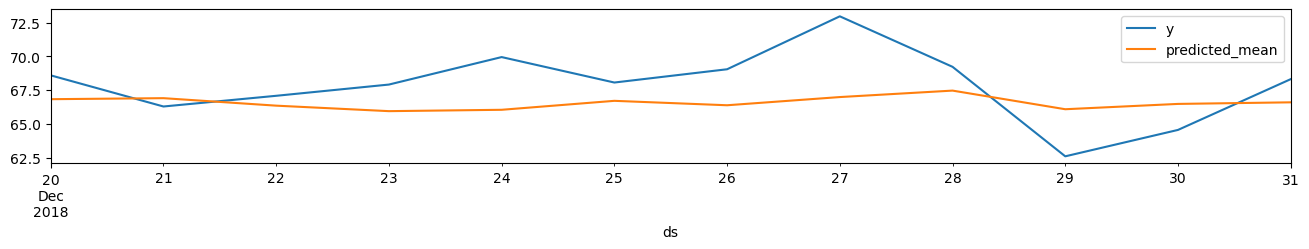

In [43]:
test_data['y'].plot(figsize = (16,2), legend=True)
arima_pred.plot(legend = True);

In [44]:
arima_rmse_error = rmse(test_data['y'], arima_pred)
arima_mse_error = arima_rmse_error**2
mean_value = df['y'].mean()
print(f'MSE Error: {arima_mse_error}\nRMSE Error: {arima_rmse_error}\nMean: {mean_value}')

MSE Error: 7.439669235560801
RMSE Error: 2.727575706659817
Mean: 57.889220246238025


In [45]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_data)
scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- ARIMA_Predictions


In [46]:
from keras.preprocessing.sequence import TimeseriesGenerator

n_input = 12
n_features= 1
generator = TimeseriesGenerator(scaled_train_data, scaled_train_data, length=n_input, batch_size=1)
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

lstm_model = Sequential()
lstm_model.add(LSTM(200, activation='relu', input_shape=(n_input, n_features)))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

lstm_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 200)               161600    
                                                                 
 dense_2 (Dense)             (None, 1)                 201       
                                                                 
Total params: 161,801
Trainable params: 161,801
Non-trainable params: 0
_________________________________________________________________


In [47]:
lstm_model.fit_generator(generator,epochs=10) # train 

Epoch 1/10


2023-05-16 17:21:31.474264: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


1438/1438 [==============================] - 4s 2ms/step - loss: 0.0085
Epoch 2/10
1438/1438 [==============================] - 4s 2ms/step - loss: 0.0062
Epoch 3/10
1438/1438 [==============================] - 4s 2ms/step - loss: 0.0054
Epoch 4/10
1438/1438 [==============================] - 3s 2ms/step - loss: 0.0050
Epoch 5/10
1438/1438 [==============================] - 4s 2ms/step - loss: 0.0048
Epoch 6/10
1438/1438 [==============================] - 4s 2ms/step - loss: 0.0047
Epoch 7/10
1438/1438 [==============================] - 4s 2ms/step - loss: 0.0045
Epoch 8/10
1438/1438 [==============================] - 4s 2ms/step - loss: 0.0044
Epoch 9/10
1438/1438 [==============================] - 4s 2ms/step - loss: 0.0043
Epoch 10/10
1438/1438 [==============================] - 4s 2ms/step - loss: 0.0043


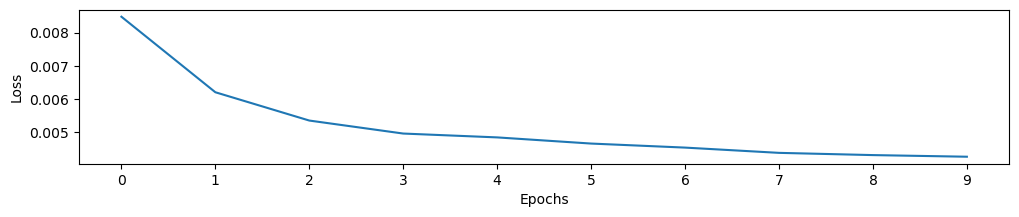

In [48]:
losses_lstm = lstm_model.history.history['loss']
plt.figure(figsize=(12,2))
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(np.arange(0,21,1))
plt.plot(range(len(losses_lstm)),losses_lstm);

In [49]:
lstm_predictions_scaled = list()

batch = scaled_train_data[-n_input:]
current_batch = batch.reshape((1, n_input, n_features))

for i in range(len(test_data)):   
    lstm_pred = lstm_model.predict(current_batch)[0]
    lstm_predictions_scaled.append(lstm_pred) 
    current_batch = np.append(current_batch[:,1:,:],[[lstm_pred]],axis=1)

1/1 [==============================] - 0s 15ms/step


In [50]:
lstm_predictions_scaled

[array([0.60363847], dtype=float32),
 array([0.5792172], dtype=float32),
 array([0.5674279], dtype=float32),
 array([0.55896264], dtype=float32),
 array([0.5591017], dtype=float32),
 array([0.5547459], dtype=float32),
 array([0.5505441], dtype=float32),
 array([0.5461957], dtype=float32),
 array([0.53749955], dtype=float32),
 array([0.52995086], dtype=float32),
 array([0.5242198], dtype=float32),
 array([0.52000546], dtype=float32)]

In [51]:
lstm_predictions = scaler.inverse_transform(lstm_predictions_scaled)
lstm_predictions

array([[65.49934158],
       [63.4364765 ],
       [62.44063248],
       [61.72557447],
       [61.73732067],
       [61.36938723],
       [61.0144587 ],
       [60.64714958],
       [59.91258674],
       [59.2749489 ],
       [58.79084743],
       [58.43486159]])

In [52]:
test_data['LSTM_Predictions'] = lstm_predictions
test_data

,y,ARIMA_Predictions,LSTM_Predictions
ds,,,
2018-12-20,68.60,66.839740,65.499342
2018-12-21,66.30,66.914986,63.436477
2018-12-22,67.09,66.361863,62.440632
2018-12-23,67.92,65.956304,61.725574
2018-12-24,69.95,66.056704,61.737321
2018-12-25,68.07,66.718307,61.369387
2018-12-26,69.05,66.391520,61.014459
2018-12-27,72.96,66.996680,60.647150
2018-12-28,69.23,67.473937,59.912587


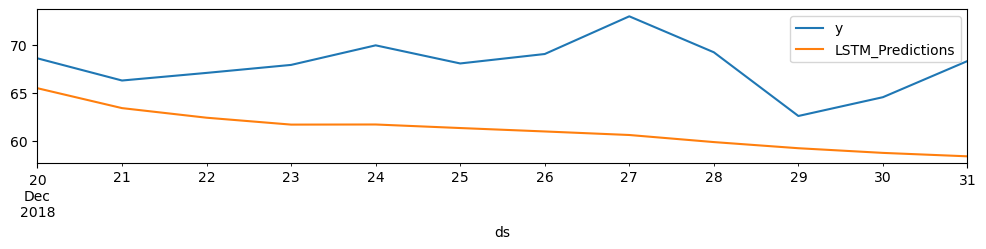

In [53]:
test_data['y'].plot(figsize = (12,2), legend=True)
test_data['LSTM_Predictions'].plot(legend = True);

In [54]:
lstm_rmse_error = rmse(test_data['y'], test_data["LSTM_Predictions"])
lstm_mse_error = lstm_rmse_error**2
mean_value = df['y'].mean()

print(f'MSE Error: {lstm_mse_error}\nRMSE Error: {lstm_rmse_error}\nMean: {mean_value}')

MSE Error: 52.953501718842546
RMSE Error: 7.276915673473381
Mean: 57.889220246238025


In [55]:
# Prophet Forecast
!pip install prophet

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1462 entries, 2014-12-31 to 2018-12-31
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       1462 non-null   float64
dtypes: float64(1)
memory usage: 22.8 KB


In [57]:
df_pr = df.copy()
df_pr = df.reset_index()
df_pr.columns = ['ds','y'] # To use prophet column names should be like that
train_data_pr = df_pr.iloc[:len(df)-12]
test_data_pr = df_pr.iloc[len(df)-12:]
from prophet import Prophet
m = Prophet()
m.fit(train_data_pr)
future = m.make_future_dataframe(periods=12,freq='MS')
prophet_pred = m.predict(future)
prophet_pred.tail()

17:22:10 - cmdstanpy - INFO - Chain [1] start processing
17:22:10 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1457,2019-08-01,73.072030,65.131560,90.707742,63.823521,83.099663,4.364405,4.364405,4.364405,2.181189,2.181189,2.181189,2.183217,2.183217,2.183217,0.0,0.0,0.0,77.436435
1458,2019-09-01,73.831216,55.505274,84.547987,62.950033,85.799693,-3.762184,-3.762184,-3.762184,-6.591786,-6.591786,-6.591786,2.829602,2.829602,2.829602,0.0,0.0,0.0,70.069031
1459,2019-10-01,74.565912,64.818460,96.388192,61.578504,88.510683,6.379662,6.379662,6.379662,2.246330,2.246330,2.246330,4.133332,4.133332,4.133332,0.0,0.0,0.0,80.945574
1460,2019-11-01,75.325098,64.728437,99.633219,60.396690,91.695370,6.269666,6.269666,6.269666,1.809624,1.809624,1.809624,4.460042,4.460042,4.460042,0.0,0.0,0.0,81.594764
1461,2019-12-01,76.059794,59.520905,98.542328,59.231382,94.680859,2.194475,2.194475,2.194475,-6.591786,-6.591786,-6.591786,8.786261,8.786261,8.786261,0.0,0.0,0.0,78.254268


In [58]:
prophet_pred = pd.DataFrame({"Date" : prophet_pred[-12:]['ds'], "Pred" : prophet_pred[-12:]["yhat"]})
prophet_pred = prophet_pred.set_index("Date")
prophet_pred.index.freq = "MS"
prophet_pred

,Pred
Date,
2019-01-01,69.826417
2019-02-01,72.528427
2019-03-01,63.193678
2019-04-01,60.091171
2019-05-01,65.892923
2019-06-01,67.991354
2019-07-01,75.373723
2019-08-01,77.436435
2019-09-01,70.069031


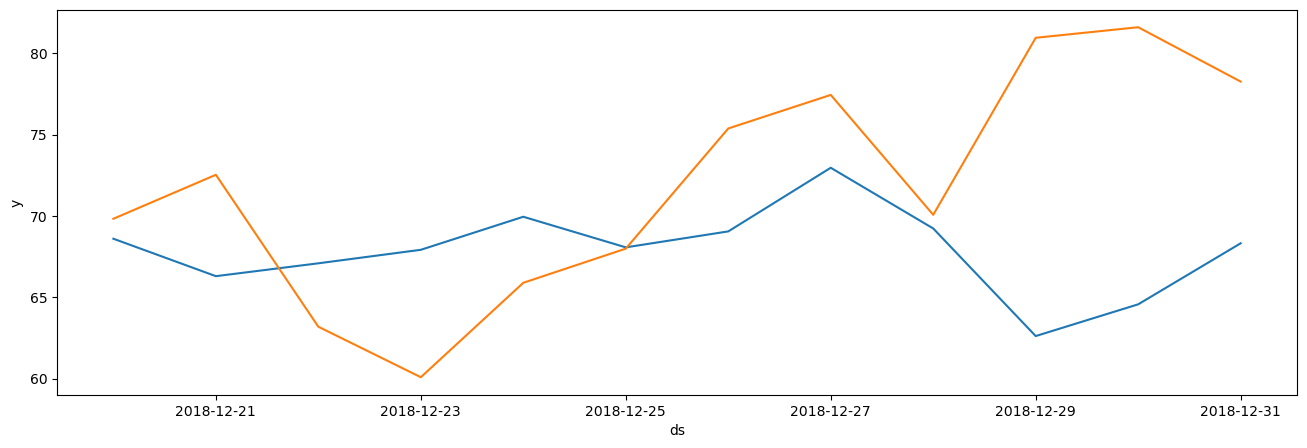

In [59]:
test_data["Prophet_Predictions"] = prophet_pred['Pred'].values
import seaborn as sns
plt.figure(figsize=(16,5))
ax = sns.lineplot(x= test_data.index, y=test_data["y"])
sns.lineplot(x=test_data.index, y = test_data["Prophet_Predictions"]);

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


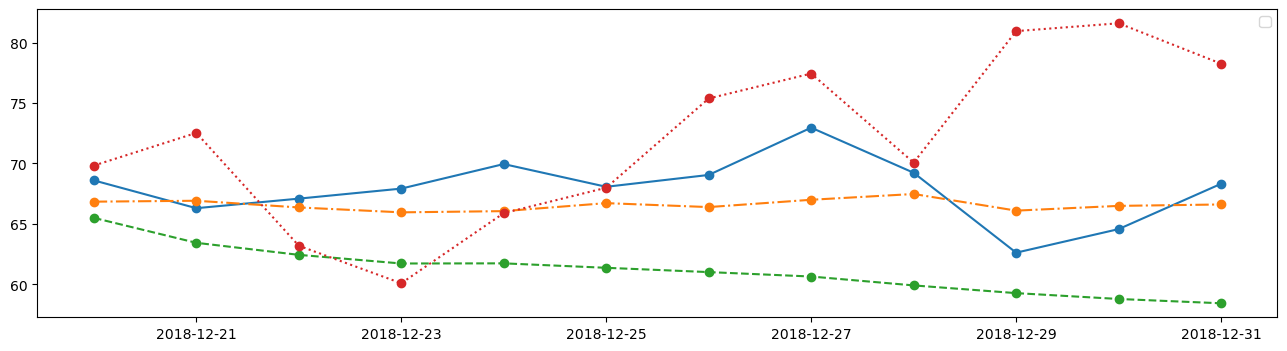

In [69]:
rmse_errors = [arima_rmse_error, lstm_rmse_error, prophet_rmse_error]
#mse_errors = [arima_mse_error, lstm_mse_error, prophet_mse_error]
errors = pd.DataFrame({"Models" : ["ARIMA", "LSTM", "Prophet"]}) # ,"RMSE Errors" : rmse_errors, "MSE Errors" : mse_errors
plt.figure(figsize=(16,4))
plt.plot_date(test_data.index, test_data["y"], linestyle="-")
plt.plot_date(test_data.index, test_data["ARIMA_Predictions"], linestyle="-.")
plt.plot_date(test_data.index, test_data["LSTM_Predictions"], linestyle="--")
plt.plot_date(test_data.index, test_data["Prophet_Predictions"], linestyle=":")
plt.legend()
plt.show()

In [66]:
prophet_rmse_error = rmse(test_data['y'], test_data["Prophet_Predictions"])
prophet_mse_error = prophet_rmse_error**2
mean_value = df['y'].mean()
print(f'MSE Error: {prophet_mse_error}\nRMSE Error: {prophet_rmse_error}\nMean: {mean_value}')

MSE Error: 76.52718218378268
RMSE Error: 8.747981606278255
Mean: 57.889220246238025


In [67]:
print(f"Mean: {test_data['y'].mean()}")
errors

Mean: 67.88999999999999


,Models
0,ARIMA
1,LSTM
2,Prophet


In [68]:
test_data

,y,ARIMA_Predictions,LSTM_Predictions,Prophet_Predictions
ds,,,,
2018-12-20,68.60,66.839740,65.499342,69.826417
2018-12-21,66.30,66.914986,63.436477,72.528427
2018-12-22,67.09,66.361863,62.440632,63.193678
2018-12-23,67.92,65.956304,61.725574,60.091171
2018-12-24,69.95,66.056704,61.737321,65.892923
2018-12-25,68.07,66.718307,61.369387,67.991354
2018-12-26,69.05,66.391520,61.014459,75.373723
2018-12-27,72.96,66.996680,60.647150,77.436435
2018-12-28,69.23,67.473937,59.912587,70.069031


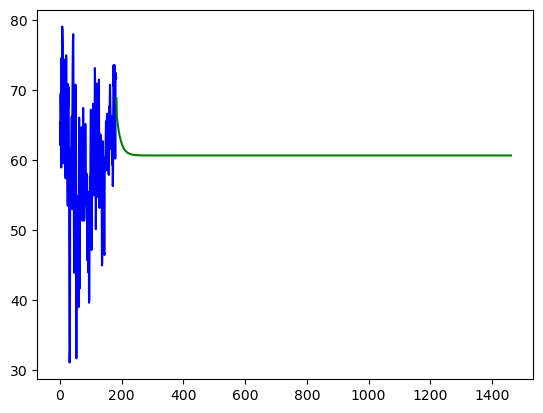

In [82]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Load/split your data
#y = pm.datasets.load_wineind()
y = df
half = round(len(y)/8)
train, test = train_test_split(y, train_size=half)

# Fit your model
model = pm.auto_arima(train, seasonal=True, m=1)

# make your forecasts
forecasts = model.predict(test.shape[0])  # predict N steps into the future

# Visualize the forecasts (blue=train, green=forecasts)
x = np.arange(y.shape[0])
plt.plot(x[:half],train, c='blue')
plt.plot(x[half:], forecasts, c='green')
plt.show()